import module

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

setting row columns dataframe

In [508]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10) 

import cleaned data

In [509]:
df = pd.read_csv(r'B:\GitHub Repository\Analysis-of-Annual-Education-Sector-Inflation-in-Indonesia\data\cleaned-data\indonesia-education-inflation-2024-2025.csv', header=None, sep=',', encoding='utf-8')

In [510]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,NaN,Pendidikan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pendidikan Dasar dan Anak Usia Dini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pendidikan Menengah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pendidikan Tinggi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pendidikan Lainnya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
1,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,2024.0
2,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,-,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
3,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,-,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,-,2024.0
4,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,-,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,-,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,-,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,-,2025.0
300,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
301,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
302,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0


**Cleaning**

In [511]:
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,NaN,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,2024.0
1,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,-,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
2,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,-,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,-,2024.0
3,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,-,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,-,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,-,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
4,KOTA BANDA ACEH,0.32,0.35,0.35,0.35,0.35,0.35,0.35,0.58,0.58,0.58,0.58,0.58,-,1.44,1.44,1.44,1.44,1.44,1.44,1.44,2.42,2.42,2.42,2.42,2.42,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,-,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,-,2025.0
299,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
300,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
301,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0


- *Set NaN Values as ''*

In [512]:
df.fillna('', inplace=True)
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_11944\432448108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('', inplace=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66
0,,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,2024.0
1,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,-,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
2,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,-,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,-,2024.0
3,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,-,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,-,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,-,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
4,KOTA BANDA ACEH,0.32,0.35,0.35,0.35,0.35,0.35,0.35,0.58,0.58,0.58,0.58,0.58,-,1.44,1.44,1.44,1.44,1.44,1.44,1.44,2.42,2.42,2.42,2.42,2.42,-,0.0,0,0,0,0,0,0,0,0,0,0,0,-,0,0,0,0,0,0,0,0,0,0,0,0,-,0,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,-,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,-,2025.0
299,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
300,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
301,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0


drop tahunan

In [513]:
df.drop(df.columns[[13, 26, 39, 52, 65]], axis=1, inplace=True)
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_11944\3769143854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[[13, 26, 39, 52, 65]], axis=1, inplace=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,66
0,,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,2024.0
1,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
2,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,2024.0
3,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
4,KOTA BANDA ACEH,0.32,0.35,0.35,0.35,0.35,0.35,0.35,0.58,0.58,0.58,0.58,0.58,1.44,1.44,1.44,1.44,1.44,1.44,1.44,2.42,2.42,2.42,2.42,2.42,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,2025.0
299,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
300,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
301,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0


In [514]:
df.columns = range(df.shape[1])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,2024.0
1,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
2,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,2024.0
3,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
4,KOTA BANDA ACEH,0.32,0.35,0.35,0.35,0.35,0.35,0.35,0.58,0.58,0.58,0.58,0.58,1.44,1.44,1.44,1.44,1.44,1.44,1.44,2.42,2.42,2.42,2.42,2.42,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,2025.0
299,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
300,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
301,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0


**Group By**

- *Columns 1-12 as Pendidikan*

- *Columns 13-24 as Pendidikan Dasar*

- *Columns 25-36 as Pendidikan Menengah*

- *Columns 37-48 as Pendidikan Tinggi*

- *Columns 49-60 as Pendidikan Lainnya*

In [515]:
# Create column groups for different education categories
pendidikan = df.iloc[:, 1:13]
pendidikan_dasar = df.iloc[:, 13:25]
pendidikan_menengah = df.iloc[:, 25:37]
pendidikan_tinggi = df.iloc[:, 37:49]
pendidikan_lainnya = df.iloc[:, 49:61]

# Add region names from the first column to each dataframe
pendidikan.insert(0, 'Region', df[0])
pendidikan_dasar.insert(0, 'Region', df[0])
pendidikan_menengah.insert(0, 'Region', df[0])
pendidikan_tinggi.insert(0, 'Region', df[0])
pendidikan_lainnya.insert(0, 'Region', df[0])

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,2024.0
1,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
2,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,2024.0
3,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,2024.0
4,KOTA BANDA ACEH,0.32,0.35,0.35,0.35,0.35,0.35,0.35,0.58,0.58,0.58,0.58,0.58,1.44,1.44,1.44,1.44,1.44,1.44,1.44,2.42,2.42,2.42,2.42,2.42,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,2025.0
299,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
300,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0
301,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025.0


*Formatting Year Column*

In [516]:
# Convert column 61 to numeric values for rows after index 0
df[61] = pd.to_numeric(df[61], errors='coerce').fillna(0).astype(int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11944\1583731539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[61] = pd.to_numeric(df[61], errors='coerce').fillna(0).astype(int)


In [517]:
df.iloc[0, 61] = 'Year'
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_11944\257258044.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Year' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[0, 61] = 'Year'


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Year
1,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,2024
2,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,2024
3,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,2024
4,KOTA BANDA ACEH,0.32,0.35,0.35,0.35,0.35,0.35,0.35,0.58,0.58,0.58,0.58,0.58,1.44,1.44,1.44,1.44,1.44,1.44,1.44,2.42,2.42,2.42,2.42,2.42,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,2025
299,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025
300,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025
301,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025


In [518]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Year
1,KAB ACEH TENGAH,0.0,0,0,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.0,0,0,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,2024
2,MEULABOH,2.79,2.26,1.81,0.7,0.7,0.7,0.7,0.7,0.73,0.73,0.66,0.66,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.17,2.25,2.25,2.25,2.25,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.68,12.22,8.57,0.49,0.49,0.49,0.49,0.49,0.49,0.49,0,0,2024
3,KAB ACEH TAMIANG,2.36,2.36,2.36,2.36,2.36,2.36,1.39,4.78,5.14,5.14,5.14,5.14,11.49,11.49,11.49,11.49,11.49,11.49,6.52,1.53,2.13,2.13,2.13,2.13,0.0,0,0,0,0,0,0,0,1.07,1.07,1.07,1.07,0,0,0,0,0,0,0,7.81,7.81,7.81,7.81,7.81,-,-,-,-,-,-,-,-,-,-,-,-,2024
4,KOTA BANDA ACEH,0.32,0.35,0.35,0.35,0.35,0.35,0.35,0.58,0.58,0.58,0.58,0.58,1.44,1.44,1.44,1.44,1.44,1.44,1.44,2.42,2.42,2.42,2.42,2.42,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,0.38,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,MERAUKE,-2.17,-2.17,-2.17,-2.17,-2.17,-2.17,-,-,-,-,-,-,-16.48,-16.48,-16.48,-16.48,-16.48,-16.48,-,-,-,-,-,-,0.62,0.62,0.62,0.62,0.62,0.62,-,-,-,-,-,-,11.11,11.11,11.11,11.11,11.11,11.11,-,-,-,-,-,-,7.38,7.38,7.38,7.38,7.38,7.38,-,-,-,-,-,-,2025
299,TIMIKA,1.09,1.09,1.09,1.09,1.09,0.2,-,-,-,-,-,-,2.67,2.67,2.67,2.67,2.67,0.37,-,-,-,-,-,-,0.14,0.14,0.14,0.14,0.14,0.14,-,-,-,-,-,-,0,0,0,0,0,0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025
300,KAB NABIRE,1.96,2.3,2.3,2.3,2.3,2.3,-,-,-,-,-,-,0.71,0.71,0.71,0.71,0.71,0.71,-,-,-,-,-,-,3.81,4.74,4.74,4.74,4.74,4.74,-,-,-,-,-,-,1.58,1.58,1.58,1.58,1.58,1.58,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025
301,KAB JAYAWIJAYA,1.82,3.15,3.15,3.15,3.15,3.15,-,-,-,-,-,-,2.47,2.47,2.47,2.47,2.47,2.47,-,-,-,-,-,-,2.15,3.95,3.95,3.95,3.95,3.95,-,-,-,-,-,-,0,3.69,3.69,3.69,3.69,3.69,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2025


**ANALYSYS**

**DETAILS**

*Inflation:*
- why kota bima dominated?
- why on july and august being replaced by the other?

*Deflation:*
- why kota kota kotamobagu dominated?
- why on june, july and august being replaced by the other?

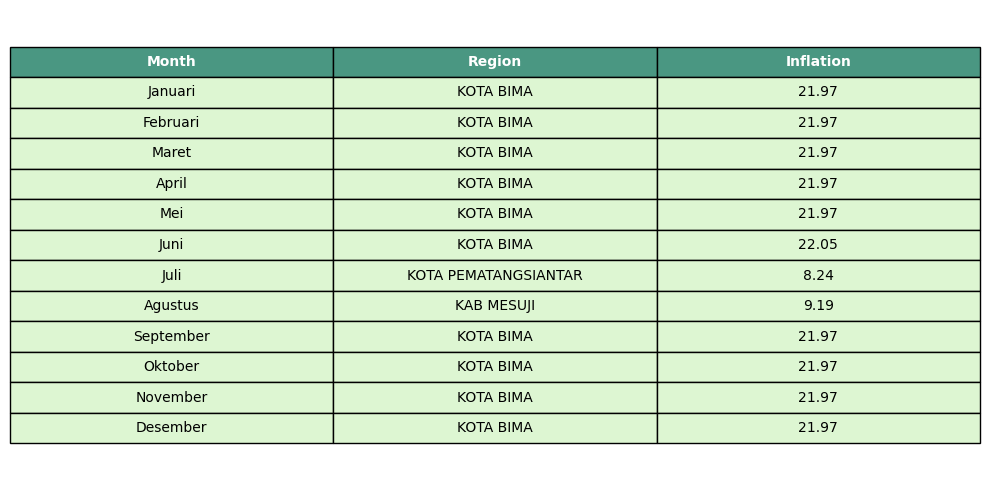

In [519]:
# Convert numeric columns to float
for col in pendidikan.columns[1:]:
    pendidikan[col] = pd.to_numeric(pendidikan[col], errors='coerce')

# Bersihkan baris tidak perlu
pendidikan = pendidikan.iloc[1:]
pendidikan = pendidikan.dropna(how='all', subset=pendidikan.columns[1:])

# Nama bulan
month_names = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Ambil data maksimum tiap bulan
result = []

for month_num, month_name in enumerate(month_names, 1):
    max_inflation = pendidikan[month_num].max()
    region = pendidikan.loc[pendidikan[month_num] == max_inflation, 'Region'].iloc[0]
    result.append([month_name, region, round(max_inflation, 2)])

# DataFrame hasil
max_inflasi_df = pd.DataFrame(result, columns=['Month', 'Region', 'Inflation'])

# Warna
warna_header = "#4A9782"
warna_cell = "#DDF6D2"

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

# Buat tabel
tabel = ax.table(cellText=max_inflasi_df.values,
                 colLabels=max_inflasi_df.columns,
                 cellLoc='center',
                 loc='center')

# Styling
tabel.auto_set_font_size(False)
tabel.set_fontsize(10)
tabel.scale(1, 1.5)

# Pewarnaan cell
for key, cell in tabel.get_celld().items():
    row, col = key
    if row == 0:  # header
        cell.set_facecolor(warna_header)
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor(warna_cell)  # semua data

plt.tight_layout()
plt.show()


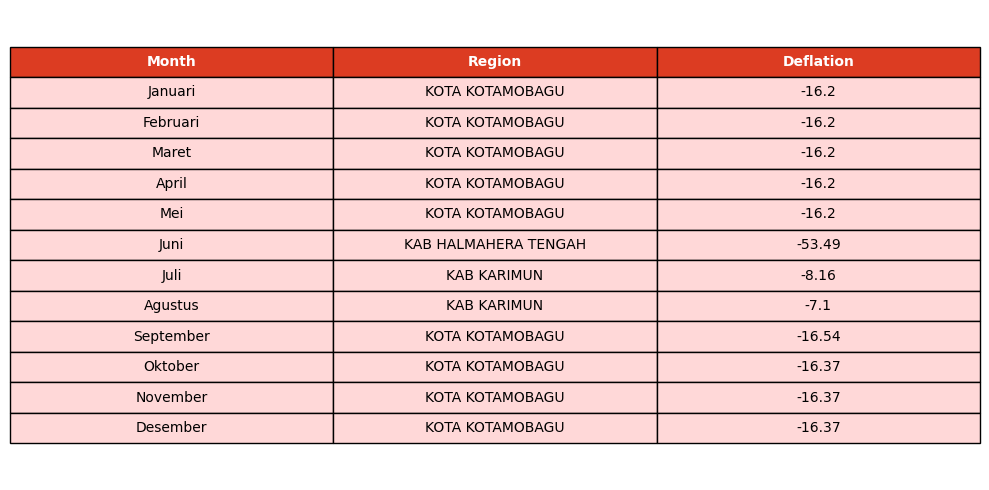

In [520]:
# Convert numeric columns to float
for col in pendidikan.columns[1:]:
    pendidikan[col] = pd.to_numeric(pendidikan[col], errors='coerce')

# Bersihkan baris tidak perlu
pendidikan = pendidikan.iloc[1:]
pendidikan = pendidikan.dropna(how='all', subset=pendidikan.columns[1:])

# Nama bulan
month_names = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Ambil data minimum tiap bulan (khusus deflasi = negatif)
result = []

for month_num, month_name in enumerate(month_names, 1):
    min_inflation = pendidikan[month_num].min()
    if min_inflation < 0:
        region = pendidikan.loc[pendidikan[month_num] == min_inflation, 'Region'].iloc[0]
        result.append([month_name, region, round(min_inflation, 2)])

# DataFrame hasil deflasi
deflasi_df = pd.DataFrame(result, columns=['Month', 'Region', 'Deflation'])

# Warna
warna_header = "#DC3C22"
warna_cell = "#FFD8D8"

# Visualisasi
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')

# Buat tabel
tabel = ax.table(cellText=deflasi_df.values,
                 colLabels=deflasi_df.columns,
                 cellLoc='center',
                 loc='center')

# Styling
tabel.auto_set_font_size(False)
tabel.set_fontsize(10)
tabel.scale(1, 1.5)

# Pewarnaan cell
for key, cell in tabel.get_celld().items():
    row, col = key
    if row == 0:  # header
        cell.set_facecolor(warna_header)
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor(warna_cell)  # semua data

plt.tight_layout()
plt.show()


**Average Inflation Comparison Across Education Sectors**

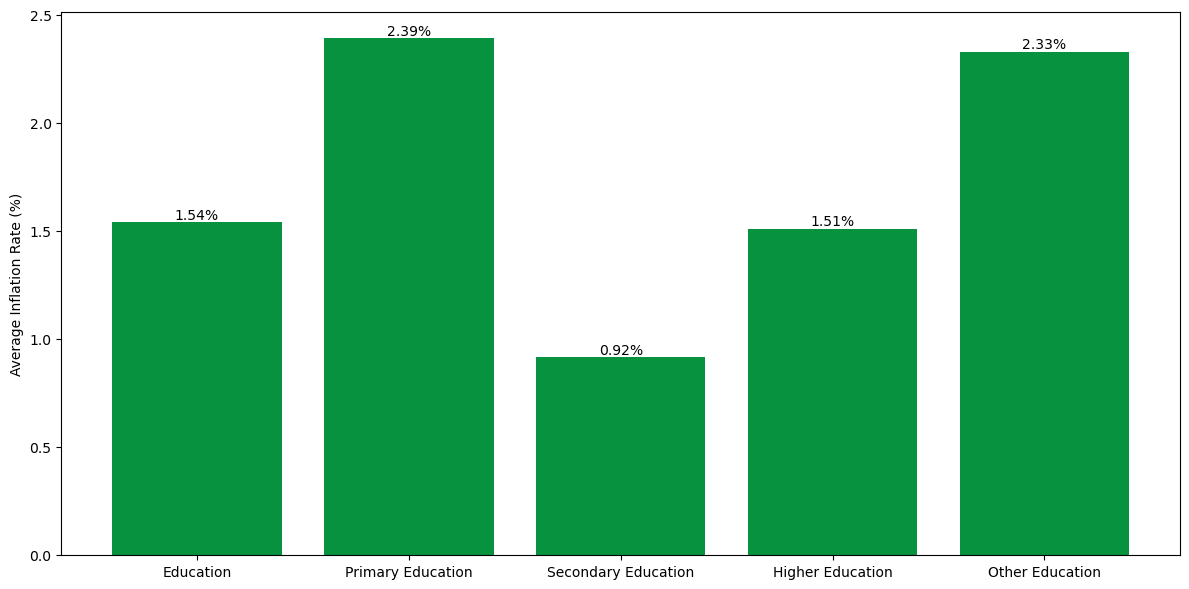

In [521]:
# Convert numeric columns for each sector
for df_sector in [pendidikan, pendidikan_dasar, pendidikan_menengah, pendidikan_tinggi, pendidikan_lainnya]:
    for col in df_sector.columns[1:]:
        df_sector[col] = pd.to_numeric(df_sector[col], errors='coerce')

# Calculate mean inflation for each sector
sector_means = {
    'Education': pendidikan.iloc[:, 1:].mean().mean(),
    'Primary Education': pendidikan_dasar.iloc[:, 1:].mean().mean(),
    'Secondary Education': pendidikan_menengah.iloc[:, 1:].mean().mean(),
    'Higher Education': pendidikan_tinggi.iloc[:, 1:].mean().mean(),
    'Other Education': pendidikan_lainnya.iloc[:, 1:].mean().mean()
}

# Create bar plot with green color scheme
plt.figure(figsize=(12, 6))
bars = plt.bar(sector_means.keys(), sector_means.values(), color='#06923E')

# Customize plot
plt.ylabel('Average Inflation Rate (%)')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Average Deflation Comparison Across Education Sectors**

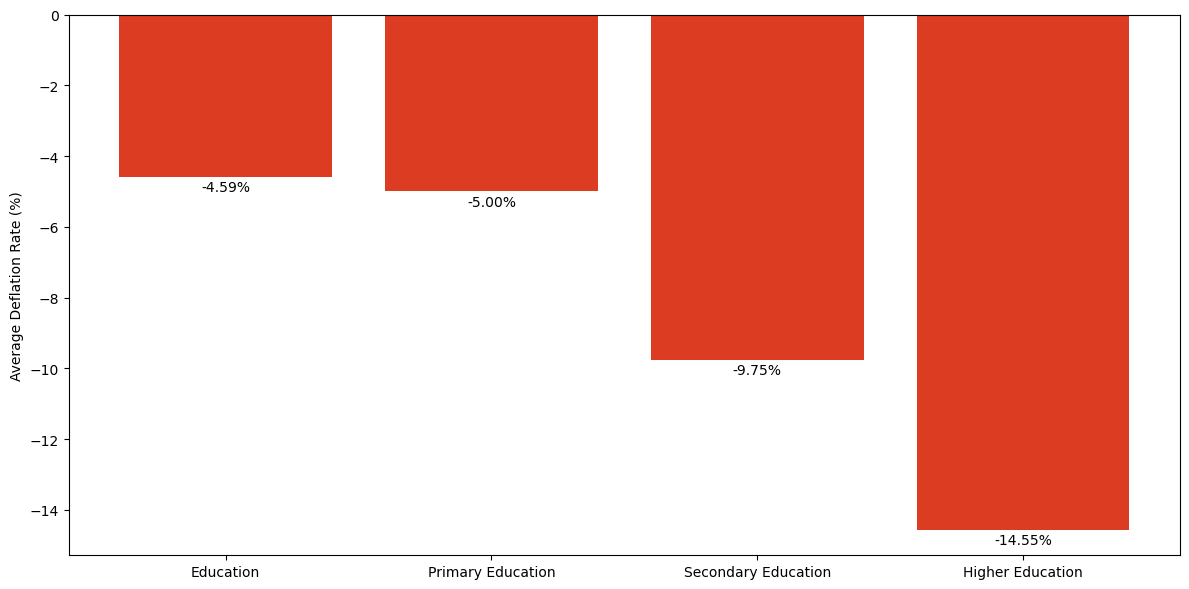

In [522]:
# Calculate mean deflation (negative inflation) for each sector
sector_deflation = {
    'Education': pendidikan.iloc[:, 1:][pendidikan.iloc[:, 1:] < 0].mean().mean(),
    'Primary Education': pendidikan_dasar.iloc[:, 1:][pendidikan_dasar.iloc[:, 1:] < 0].mean().mean(),
    'Secondary Education': pendidikan_menengah.iloc[:, 1:][pendidikan_menengah.iloc[:, 1:] < 0].mean().mean(),
    'Higher Education': pendidikan_tinggi.iloc[:, 1:][pendidikan_tinggi.iloc[:, 1:] < 0].mean().mean(),
    'Other Education': pendidikan_lainnya.iloc[:, 1:][pendidikan_lainnya.iloc[:, 1:] < 0].mean().mean()
}

# Create bar plot with red color for deflation
plt.figure(figsize=(12, 6))
bars = plt.bar(sector_deflation.keys(), sector_deflation.values(), color='#DC3C22')
plt.ylabel('Average Deflation Rate (%)')
plt.xticks(rotation=0, ha='center')

# Add value labels below each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 0.1,
             f'{height:.2f}%', ha='center', va='top', fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

**Average Monthly Education Inflation Trend**

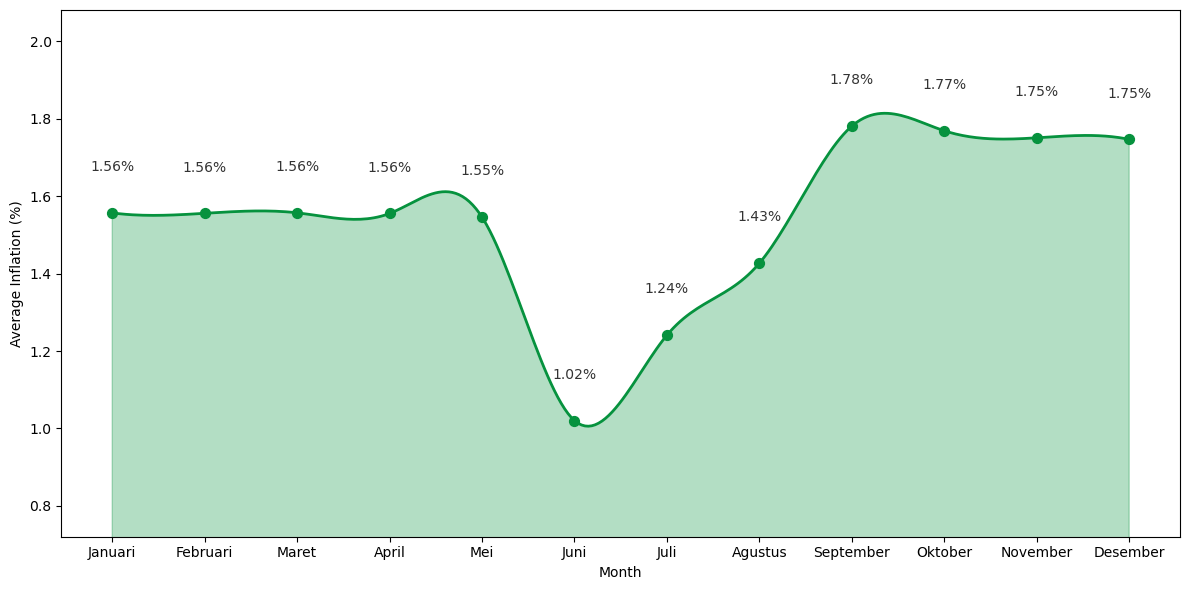

In [523]:
# Data
monthly_avg = pendidikan.iloc[:, 1:].mean()
month_names = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
               'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Siapkan x dan y dalam bentuk numerik
x = np.arange(len(month_names))
y = monthly_avg.values

# Buat kurva halus dengan interpolasi spline
x_smooth = np.linspace(x.min(), x.max(), 300)
spline = make_interp_spline(x, y, k=3)  # k=3 untuk cubic spline
y_smooth = spline(x_smooth)

# Plot
plt.figure(figsize=(12, 6))

# Tambah margin untuk y-axis supaya label tidak nabrak
y_min = y.min()
y_max = y.max()
margin = 0.3
plt.ylim(y_min - margin, y_max + margin)

plt.plot(x_smooth, y_smooth, color='#06923E', linewidth=2)
plt.fill_between(x_smooth, y_smooth, color='#06923E', alpha=0.3)

# Tampilkan titik-titik data asli (opsional)
plt.scatter(x, y, color='#06923E', s=50)

# Tambahkan label bulan
plt.xticks(x, month_names, rotation=0, ha='center')

# Teks nilai inflasi di atas titik
for xi, yi in zip(x, y):
    plt.text(xi, yi + 0.1, f'{yi:.2f}%', ha='center', va='bottom', fontsize=10, color='#333333')

# Label & styling
plt.xlabel('Month')
plt.ylabel('Average Inflation (%)')
plt.grid(True, linestyle='', alpha=0.7)
plt.tight_layout()

# Tampilkan plot
plt.show()

**Average Education Inflation: Indonesia vs Top 3 Regions**

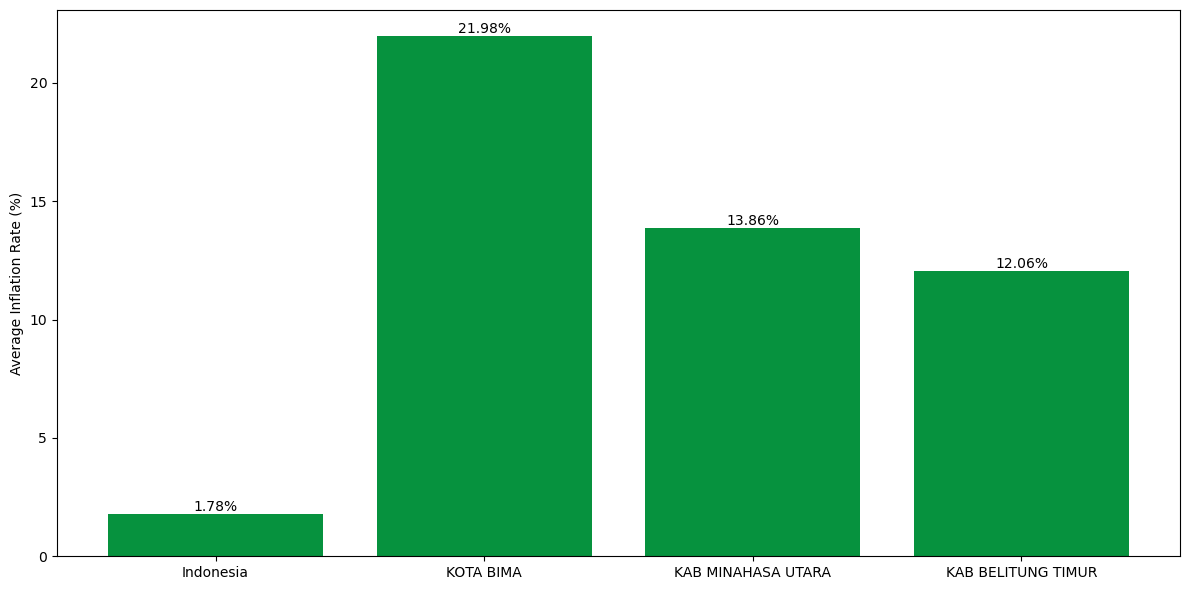

In [524]:
# Calculate average inflation for each region across all months
pendidikan['avg_inflation'] = pendidikan.iloc[:, 1:].mean(axis=1)

# Get Indonesia's average
indonesia_avg = pendidikan[pendidikan['Region'] == 'INDONESIA']['avg_inflation'].values[0]

# Get top 3 regions (excluding Indonesia)
top_3_regions = pendidikan[pendidikan['Region'] != 'INDONESIA'].nlargest(3, 'avg_inflation')

# Prepare data for plotting
regions = ['Indonesia'] + list(top_3_regions['Region'])
values = [indonesia_avg] + list(top_3_regions['avg_inflation'])

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(regions, values, color='#06923E')

# Customize plot
plt.ylabel('Average Inflation Rate (%)')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%',
             ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Top 3 Regions of Total Inflation in 1 Year and Displays The Average in 1 Year**

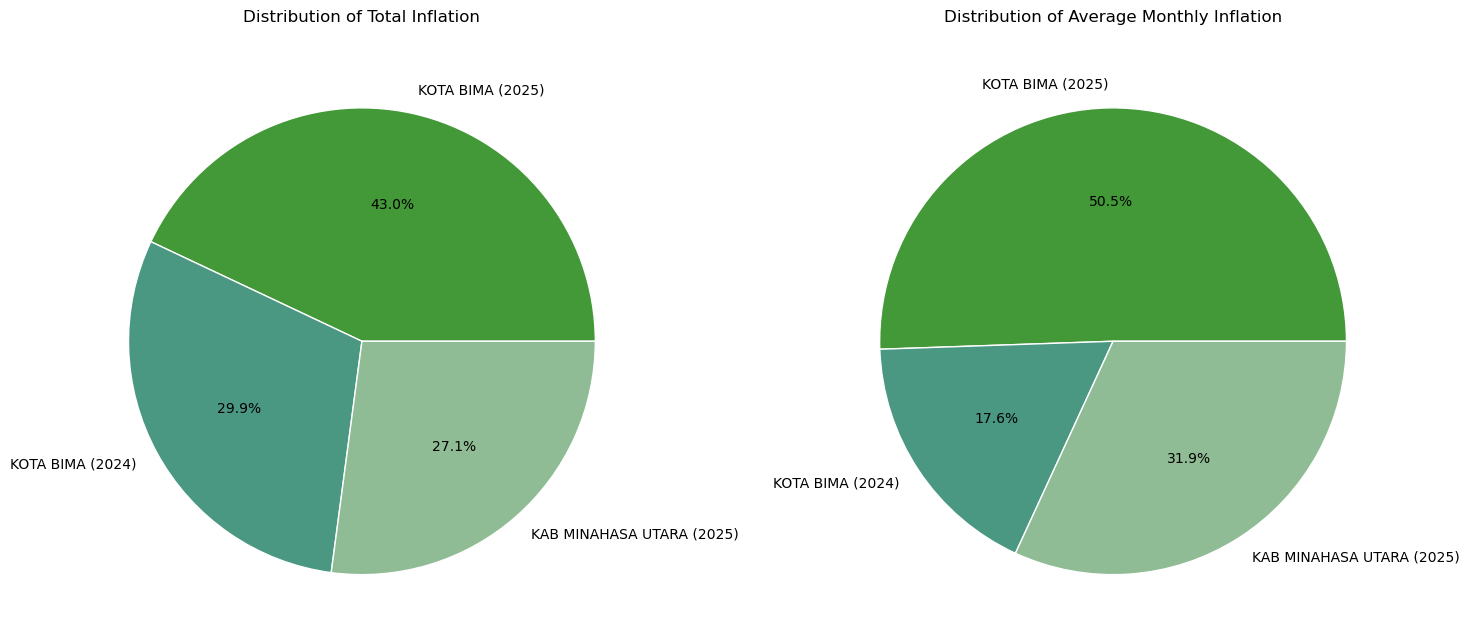

In [525]:
# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Add year information to region labels
regions_with_year = [f"{region} ({top_3['Year'].iloc[i]})" for i, region in enumerate(top_3['Region'])]

# Data for pie charts
sum_values = top_3['sum_inflation'].tolist()
avg_values = top_3['avg_inflation'].tolist()

# Colors - using a specific color for each year
colors = ['#439838', '#4A9782', '#8FBC94']  # 2024 and 2025 colors

# First pie chart (Sum Inflation)
ax1.pie(sum_values, labels=regions_with_year, autopct='%1.1f%%', colors=colors,
    wedgeprops={'edgecolor': 'white'})
ax1.set_title('Distribution of Total Inflation', pad=20)

# Second pie chart (Average Inflation)
ax2.pie(avg_values, labels=regions_with_year, autopct='%1.1f%%', colors=colors,
    wedgeprops={'edgecolor': 'white'})
ax2.set_title('Distribution of Average Monthly Inflation', pad=20)

# Adjust layout
plt.tight_layout()
plt.show()